# **Microplane MS1 - uncoupled N-T interface**

This sheets shows the application of the microplane integration
on an example of VUNTIM (vectorized implementation of the uncoupled NT Interface Model.

In [8]:
%matplotlib widget
from bmcs_matmod.msx import MSX
import matplotlib.pylab as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore');

The example below demonstrate a case with ideally plastic response which delivers
several peaks in the response. At the same time, it can be used to demonstrate that 
$\nu \leq 0.25$ leads does not deliver any solution upon return mapping due to a square root overflow.

Once $E_\mathrm{T}$ becomes negative, the return mapping algorithm cannot work properly.
Is there some thermodynamically admissible interpretation of this case in the interface?
This can be posed in two questions:
 - is it posssible to obtain a positive dissipation of an interface even for negative
   value of $E_\mathrm{T}$?
 - if yes, is it allowed to reach an inelastic domain in the tangential direction?

In [14]:
%matplotlib widget
mpl = MSX(E=28000, nu=0.2, 
          mic='untim', eps_max=0.01, n_eps=30, double_pvw=True)
mpl.mic_.trait_set(Ad=2000)
mpl.interact()

In [17]:
from ibvpy.api import XDomainSinglePoint, MATS3DScalarDamage, TStepBC, BCDof
xmodel = XDomainSinglePoint()
m = TStepBC(
    domains=[(xmodel, mpl),],
    bc=[BCDof(
            var='u', dof=0, value=0.01,
        )]
)
m.sim.tline.trait_set(step=0.01)
m.sim.reset()
m.sim.run()

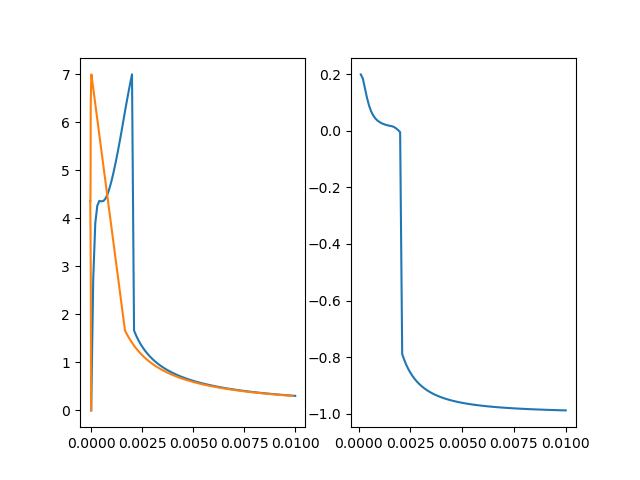

In [18]:
%matplotlib widget
import matplotlib.pylab as plt
_, (ax, ax_nu) = plt.subplots(1,2)
ax.plot(m.hist.U_t[:,0], m.hist.F_t[:,0])
ax.plot(m.hist.U_t[:,2], m.hist.F_t[:,0])
ax_nu.plot(m.hist.U_t[:,0], -m.hist.U_t[:,1] / m.hist.U_t[:,0])